In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [259]:
df = pd.read_csv("data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [261]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [262]:
df.shape

(7043, 21)

In [263]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [264]:
df.duplicated().sum()

0

In [265]:
df['Churn'].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [266]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

In [267]:
# df['ExpectedCharges'] = df['tenure'] * df['MonthlyCharges']
# df['BillingDifference'] = df['TotalCharges'] - df['ExpectedCharges']
# df_diff = df[abs(df['BillingDifference']) > 1]
# print(f"Rows with mismatched TotalCharges: {len(df_diff)}")
# df[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'ExpectedCharges', 'BillingDifference','Churn']].head(10)

In [268]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)


Categorical columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [269]:
df.drop(columns=['customerID'], inplace=True)


In [270]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10,6))
# sns.kdeplot(data=df, x='BillingDifference', hue='Churn', fill=True, common_norm=False, alpha=0.5)
# plt.title('Billing Difference Distribution by Churn Status')
# plt.xlabel('Billing Difference (Actual - Expected)')
# plt.ylabel('Density')
# plt.axvline(0, color='black', linestyle='--', linewidth=1)
# plt.show()


In [271]:
# 1. Percentage of churn vs retained customers
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print("Churn vs Retained (%):")
print(churn_counts)

# Plot
fig = px.bar(
    x=churn_counts.index,
    y=churn_counts.values,
    text=churn_counts.values.round(2),
    labels={'x': 'Churn', 'y': 'Percentage (%)'},
    color=churn_counts.index,
    color_discrete_sequence=["#02F426", "#FC1818"],
    width=500,
    height=400
)

fig.update_traces(textposition='outside')
fig.update_layout(title="Churn vs Retained (%)", showlegend=False)
fig.show()

Churn vs Retained (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [272]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [273]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns and their unique values:\n")
for col in categorical_cols:
    print(f"{col}: {df[col].unique().tolist()}")

print("\nNumerical columns:")
print(numerical_cols)


Categorical columns and their unique values:

gender: ['Female', 'Male']
Partner: ['Yes', 'No']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
MultipleLines: ['No phone service', 'No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes', 'No internet service']
OnlineBackup: ['Yes', 'No', 'No internet service']
DeviceProtection: ['No', 'Yes', 'No internet service']
TechSupport: ['No', 'Yes', 'No internet service']
StreamingTV: ['No', 'Yes', 'No internet service']
StreamingMovies: ['No', 'Yes', 'No internet service']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['Yes', 'No']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

Numerical columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [274]:
replace_no_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df[replace_no_internet] = df[replace_no_internet].replace('No internet service', 'No')
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')


In [275]:
print("Categorical columns and their unique values:\n")
for col in categorical_cols:
    print(f"{col}: {df[col].unique().tolist()}")

Categorical columns and their unique values:

gender: ['Female', 'Male']
Partner: ['Yes', 'No']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
MultipleLines: ['No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes']
OnlineBackup: ['Yes', 'No']
DeviceProtection: ['No', 'Yes']
TechSupport: ['No', 'Yes']
StreamingTV: ['No', 'Yes']
StreamingMovies: ['No', 'Yes']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['Yes', 'No']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']


In [276]:
import pandas as pd

columns = ['MonthlyCharges', 'tenure', 'TotalCharges']
outlier_info = {}

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_info[col] = {
        "num_outliers": outliers.shape[0],
        "outlier_values": outliers.values
    }

# Display number of outliers per column
for col, info in outlier_info.items():
    print(f"{col} - Number of outliers: {info['num_outliers']}")


MonthlyCharges - Number of outliers: 0
tenure - Number of outliers: 0
TotalCharges - Number of outliers: 0


In [277]:
gender_churn = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
gender_churn_pct = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by Gender:")
print(gender_churn_pct)

fig = px.histogram(df, x="gender", color="Churn", width=600, height=400,
barmode='group', color_discrete_sequence=["#02F426", "#FC1818"])

fig.update_layout(title="Churn Distribution by Gender",
                  xaxis_title="Gender",
                  yaxis_title="Count")


Churn % by Gender:
Churn           0          1
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


In [278]:
# Churn % by Partner
partner_churn = df.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)
partner_churn_pct = partner_churn.div(partner_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by Partner:")
print(partner_churn_pct)

# Plot
fig = px.histogram(df,x="Partner",color="Churn",width=600,
    height=400,barmode='group',color_discrete_sequence=["#02F426", "#FC1818"])
fig.update_layout(
    title="Churn Distribution by Partner",
    xaxis_title="Partner",
    yaxis_title="Count")
fig.show()



Churn % by Partner:
Churn            0          1
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


In [279]:
# Churn % by SeniorCitizen
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
senior_churn_pct = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by Senior Citizen:")
print(senior_churn_pct)

# Plot
fig = px.histogram(df,x="SeniorCitizen",
    color="Churn",
    width=600,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Senior Citizen",
    xaxis_title="Senior Citizen (0 = No, 1 = Yes)",
    yaxis_title="Count"
)
fig.show()



Churn % by Senior Citizen:
Churn                  0          1
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


In [280]:
# Churn % by Dependents
dependents_churn = df.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0)
dependents_churn_pct = dependents_churn.div(dependents_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by Dependents:")
print(dependents_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="Dependents",
    color="Churn",
    width=600,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Dependents",
    xaxis_title="Dependents",
    yaxis_title="Count"
)
fig.show()



Churn % by Dependents:
Churn               0          1
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


In [281]:
# Churn % by PhoneService
phone_churn = df.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)
phone_churn_pct = phone_churn.div(phone_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by PhoneService:")
print(phone_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="PhoneService",
    color="Churn",
    width=600,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)

fig.update_layout(
    title="Churn Distribution by Phone Service",
    xaxis_title="Phone Service",
    yaxis_title="Count"
)

fig.show()



Churn % by PhoneService:
Churn                 0          1
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481


In [282]:
# Churn % by MultipleLines
multiplelines_churn = df.groupby(['MultipleLines', 'Churn']).size().unstack(fill_value=0)
multiplelines_churn_pct = multiplelines_churn.div(multiplelines_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by MultipleLines:")
print(multiplelines_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="MultipleLines",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)

fig.update_layout(
    title="Churn Distribution by Multiple Lines",
    xaxis_title="Multiple Lines",
    yaxis_title="Count"
)

fig.show()



Churn % by MultipleLines:
Churn                  0          1
MultipleLines                      
No             74.932349  25.067651
Yes            71.351534  28.648466


In [283]:
# Churn % by InternetService
internet_churn = df.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)
internet_churn_pct = internet_churn.div(internet_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by InternetService:")
print(internet_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="InternetService",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)

fig.update_layout(
    title="Churn Distribution by Internet Service",
    xaxis_title="Internet Service",
    yaxis_title="Count"
)

fig.show()



Churn % by InternetService:
Churn                    0          1
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


In [284]:
# Churn % by OnlineSecurity
onlinesecurity_churn = df.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)
onlinesecurity_churn_pct = onlinesecurity_churn.div(onlinesecurity_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by OnlineSecurity:")
print(onlinesecurity_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="OnlineSecurity",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)

fig.update_layout(
    title="Churn Distribution by Online Security",
    xaxis_title="Online Security",
    yaxis_title="Count"
)

fig.show()



Churn % by OnlineSecurity:
Churn                   0          1
OnlineSecurity                      
No              68.626669  31.373331
Yes             85.359801  14.640199


In [285]:
# Churn % by OnlineBackup
onlinebackup_churn = df.groupby(['OnlineBackup', 'Churn']).size().unstack(fill_value=0)
onlinebackup_churn_pct = onlinebackup_churn.div(onlinebackup_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by OnlineBackup:")
print(onlinebackup_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="OnlineBackup",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Online Backup",
    xaxis_title="Online Backup",
    yaxis_title="Count"
)
fig.show()



Churn % by OnlineBackup:
Churn                0         1
OnlineBackup                    
No            70.78359  29.21641
Yes           78.43299  21.56701


In [286]:
# Churn % by DeviceProtection
deviceprotection_churn = df.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0)
deviceprotection_churn_pct = deviceprotection_churn.div(deviceprotection_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by DeviceProtection:")
print(deviceprotection_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="DeviceProtection",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Device Protection",
    xaxis_title="Device Protection",
    yaxis_title="Count"
)
fig.show()



Churn % by DeviceProtection:
Churn                     0          1
DeviceProtection                      
No                71.304725  28.695275
Yes               77.460711  22.539289


In [287]:
# Churn % by TechSupport
techsupport_churn = df.groupby(['TechSupport', 'Churn']).size().unstack(fill_value=0)
techsupport_churn_pct = techsupport_churn.div(techsupport_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by TechSupport:")
print(techsupport_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="TechSupport",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Tech Support",
    xaxis_title="Tech Support",
    yaxis_title="Count"
)
fig.show()



Churn % by TechSupport:
Churn                0          1
TechSupport                      
No           68.770032  31.229968
Yes          84.803922  15.196078


In [288]:
# Churn % by StreamingTV
streamingtv_churn = df.groupby(['StreamingTV', 'Churn']).size().unstack(fill_value=0)
streamingtv_churn_pct = streamingtv_churn.div(streamingtv_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by StreamingTV:")
print(streamingtv_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="StreamingTV",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Streaming TV",
    xaxis_title="Streaming TV",
    yaxis_title="Count"
)
fig.show()



Churn % by StreamingTV:
Churn                0          1
StreamingTV                      
No           75.629476  24.370524
Yes          69.885313  30.114687


In [289]:
# Churn % by StreamingMovies
streamingmovies_churn = df.groupby(['StreamingMovies', 'Churn']).size().unstack(fill_value=0)
streamingmovies_churn_pct = streamingmovies_churn.div(streamingmovies_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by StreamingMovies:")
print(streamingmovies_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="StreamingMovies",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Streaming Movies",
    xaxis_title="Streaming Movies",
    yaxis_title="Count"
)
fig.show()



Churn % by StreamingMovies:
Churn                    0          1
StreamingMovies                      
No               75.563822  24.436178
Yes              70.047602  29.952398


In [290]:
# Churn % by Contract
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
contract_churn_pct = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by Contract:")
print(contract_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="Contract",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Contract",
    xaxis_title="Contract",
    yaxis_title="Count"
)
fig.show()



Churn % by Contract:
Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


In [291]:
# Churn % by PaperlessBilling
paperless_churn = df.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
paperless_churn_pct = paperless_churn.div(paperless_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by PaperlessBilling:")
print(paperless_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="PaperlessBilling",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Paperless Billing",
    xaxis_title="Paperless Billing",
    yaxis_title="Count"
)
fig.show()



Churn % by PaperlessBilling:
Churn                     0          1
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


In [292]:
# Churn % by PaymentMethod
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
payment_churn_pct = payment_churn.div(payment_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by PaymentMethod:")
print(payment_churn_pct)

# Plot
fig = px.histogram(
    df,
    x="PaymentMethod",
    color="Churn",
    width=900,
    height=500,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Payment Method",
    xaxis_title="Payment Method",
    yaxis_title="Count"
)
fig.show()



Churn % by PaymentMethod:
Churn                              0          1
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


In [293]:
fig = px.box(
    df,
    x="Churn",
    y="tenure",
    color="Churn",
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Tenure Distribution by Churn",
    xaxis_title="Churn",
    yaxis_title="Tenure (Months)"
)
fig.show()


In [294]:
import plotly.express as px

fig = px.histogram(
    df,
    x="MonthlyCharges",
    color="Churn",
    nbins=40,
    opacity=0.6,
    barmode="overlay",
    color_discrete_sequence=["#02F426", "#FC1818"]
)

fig.update_layout(
    title="Distribution of Monthly Charges by Churn Status",
    xaxis_title="Monthly Charges ($)",
    yaxis_title="Number of Customers"
)

fig.show()


In [295]:
df.drop(columns=['gender','PhoneService'], inplace=True)
df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,0,Yes,Yes,11,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [296]:
# List of service-related columns
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert Yes/No to 1/0 if not already done
for col in service_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Create TotalServicesSubscribed feature
df['TotalServicesSubscribed'] = df[service_cols].sum(axis=1)

# Check the new feature
df[['TotalServicesSubscribed'] + service_cols].head()


,TotalServicesSubscribed,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,1,0,0,0,0
1,2,1,0,1,0,0,0
2,2,1,1,0,0,0,0
3,3,1,0,1,1,0,0
4,0,0,0,0,0,0,0


In [297]:
df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServicesSubscribed
0,0,Yes,No,1,No,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,0,No,No,34,No,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,0,2
2,0,No,No,2,No,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,0,No,No,45,No,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,0,No,No,2,No,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.50,0,5
7039,0,Yes,Yes,72,Yes,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,0,4
7040,0,Yes,Yes,11,No,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,0,1
7041,1,Yes,No,4,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.60,1,0


In [298]:
import plotly.express as px

# Group by TotalServicesSubscribed and Churn
services_churn = df.groupby(['TotalServicesSubscribed', 'Churn']).size().unstack(fill_value=0)

# Calculate percentage of churn per service count
services_churn_pct = services_churn.div(services_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by Total Services Subscribed:")
print(services_churn_pct)

# Plot grouped bar chart
fig = px.histogram(
    df,
    x="TotalServicesSubscribed",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)

fig.update_layout(
    title="Churn Distribution by Total Services Subscribed",
    xaxis_title="Total Services Subscribed",
    yaxis_title="Count"
)
fig.show()



Churn % by Total Services Subscribed:
Churn                            0          1
TotalServicesSubscribed                      
0                        78.535924  21.464076
1                        54.244306  45.755694
2                        64.181994  35.818006
3                        72.605192  27.394808
4                        77.647059  22.352941
5                        87.521968  12.478032
6                        94.718310   5.281690


In [299]:
# df['TotalServicesSubscribed'] = df['TotalServicesSubscribed'].replace(0, np.nan)
# df['AvgChargePerService'] = df['MonthlyCharges'] / df['TotalServicesSubscribed']
# df['AvgChargePerService'] = df['AvgChargePerService'].fillna(0)

In [300]:
# services_churn_avg = df.groupby(['AvgChargePerService', 'Churn']).size().unstack(fill_value=0)
# services_churn_avg_pct = services_churn_avg.div(services_churn_avg.sum(axis=1), axis=0) * 100
# print("\nChurn % by Avg Charge Per Service:")
# print(services_churn_avg_pct)

# fig = px.histogram(
#     df,
#     x="AvgChargePerService",
#     color="Churn",
#     width=700,
#     height=400,
#     barmode='group',
#     color_discrete_sequence=["#02F426", "#FC1818"]
# )
# fig.update_layout(
#     title="Churn Distribution by Avg Charge Per Service",
#     xaxis_title="Average Charge Per Service",
#     yaxis_title="Count"
# )
# fig.show()


In [301]:
df['SeniorNoTechSupport'] = ((df['SeniorCitizen'] == 1) & (df['TechSupport'] == 0)).astype(int)

senior_churn = df.groupby(['SeniorNoTechSupport', 'Churn']).size().unstack(fill_value=0)
senior_churn_pct = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by Senior No Tech Support:")
print(senior_churn_pct)

fig = px.histogram(
    df,
    x="SeniorNoTechSupport",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"]
)
fig.update_layout(
    title="Churn Distribution by Senior Citizens without Tech Support",
    xaxis_title="Senior No Tech Support (0=No, 1=Yes)",
    yaxis_title="Count"
)
fig.show()



Churn % by Senior No Tech Support:
Churn                        0          1
SeniorNoTechSupport                      
0                    76.520325  23.479675
1                    51.814059  48.185941


In [302]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61-72 months']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

In [303]:
tenure_churn = df.groupby(['TenureGroup', 'Churn']).size().unstack(fill_value=0)
tenure_churn_pct = tenure_churn.div(tenure_churn.sum(axis=1), axis=0) * 100
print("\nChurn % by Tenure Group:")
print(tenure_churn_pct)

fig = px.histogram(
    df,
    x="TenureGroup",
    color="Churn",
    width=700,
    height=400,
    barmode='group',
    color_discrete_sequence=["#02F426", "#FC1818"],
    category_orders={"TenureGroup": labels}  # enforce correct order
)

fig.update_layout(
    title="Churn Distribution by Tenure Group",
    xaxis_title="Tenure Group",
    yaxis_title="Count"
)
fig.show()



Churn % by Tenure Group:
Churn                 0          1
TenureGroup                       
0-12 months   52.321839  47.678161
13-24 months  71.289062  28.710938
25-36 months  78.365385  21.634615
37-48 months  80.971129  19.028871
49-60 months  85.576923  14.423077
61-72 months  93.390192   6.609808


In [304]:
df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServicesSubscribed,SeniorNoTechSupport,TenureGroup
0,0,Yes,No,1,No,DSL,0,1,0,0,...,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0,0-12 months
1,0,No,No,34,No,DSL,1,0,1,0,...,0,One year,No,Mailed check,56.95,1889.50,0,2,0,25-36 months
2,0,No,No,2,No,DSL,1,1,0,0,...,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,2,0,0-12 months
3,0,No,No,45,No,DSL,1,0,1,1,...,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0,37-48 months
4,0,No,No,2,No,Fiber optic,0,0,0,0,...,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0,0-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,1,0,1,1,...,1,One year,Yes,Mailed check,84.80,1990.50,0,5,0,13-24 months
7039,0,Yes,Yes,72,Yes,Fiber optic,0,1,1,0,...,1,One year,Yes,Credit card (automatic),103.20,7362.90,0,4,0,61-72 months
7040,0,Yes,Yes,11,No,DSL,1,0,0,0,...,0,Month-to-month,Yes,Electronic check,29.60,346.45,0,1,0,0-12 months
7041,1,Yes,No,4,Yes,Fiber optic,0,0,0,0,...,0,Month-to-month,Yes,Mailed check,74.40,306.60,1,0,1,0-12 months


In [305]:
onehot_cols = ['PaymentMethod', 'Contract']
binary_cols = ['Partner', 'Dependents', 'PaperlessBilling', 
               'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
               'TenureGroup']
numerical_cols = ['MonthlyCharges', 'TotalCharges', 'tenure', 'TotalServicesSubscribed']

In [306]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [307]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_cols),
    ('label', OrdinalEncoder(), binary_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [308]:

# Apply the preprocessor to training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Get proper column names
onehot_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)
all_cols = numerical_cols + list(onehot_names) + binary_cols

# Create a DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_cols)
print(X_train_transformed_df.head())

   MonthlyCharges  TotalCharges    tenure  TotalServicesSubscribed  \
0        0.981556      1.659900  1.321816                 1.053668   
1       -0.971546     -0.562252 -0.267410                -0.030848   
2        0.837066      1.756104  1.444064                 0.511410   
3        0.641092     -0.908326 -1.204646                -0.030848   
4       -0.808787     -0.101561  0.669826                -0.030848   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    1.0                             0.0   
1                                    0.0                             1.0   
2                                    1.0                             0.0   
3                                    0.0                             1.0   
4                                    0.0                             0.0   

   PaymentMethod_Mailed check  Contract_One year  Contract_Two year  Partner  \
0                         0.0             

Feature Importances:
MonthlyCharges: 0.2161
TotalCharges: 0.1863
tenure: 0.1548
TenureGroup: 0.0602
PaymentMethod_Electronic check: 0.0486
TotalServicesSubscribed: 0.0448
Contract_Two year: 0.0297
PaperlessBilling: 0.0290
Partner: 0.0247
Contract_One year: 0.0237
MultipleLines: 0.0227
Dependents: 0.0211
OnlineSecurity: 0.0211
OnlineBackup: 0.0199
TechSupport: 0.0196
DeviceProtection: 0.0179
StreamingMovies: 0.0176
StreamingTV: 0.0164
PaymentMethod_Credit card (automatic): 0.0137
PaymentMethod_Mailed check: 0.0122


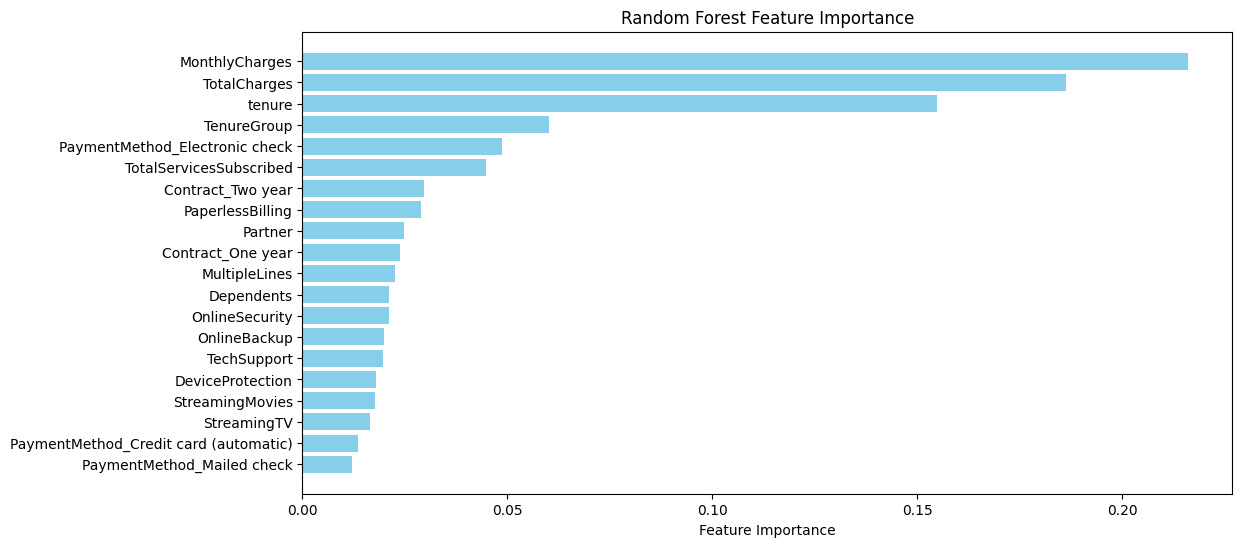

In [309]:

# Preprocess the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Fit Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
onehot_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)
all_feature_names = numerical_cols + list(onehot_names) + binary_cols

# Sort indices
indices = np.argsort(feature_importances)[::-1]

# Print feature importances
print("Feature Importances:")
for i in indices:
    print(f"{all_feature_names[i]}: {feature_importances[i]:.4f}")

# Plot
plt.figure(figsize=(12,6))
plt.barh([all_feature_names[i] for i in indices], feature_importances[indices], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [310]:
categorical_indices = list(range(len(numerical_cols), len(numerical_cols) + len(onehot_cols) + len(binary_cols)))
smote = SMOTENC(categorical_features=categorical_indices, random_state=42)

# List of models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Categorical indices for SMOTENC (only label-encoded categorical columns)
categorical_indices = list(range(len(numerical_cols), len(binary_cols)+len(numerical_cols)))

for name, model in models.items():
    print(f"=== {name} ===")
    
    # Pipeline with preprocessor, SMOTE, and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote',smote),
        ('classifier', model)
    ])
    
    # Fit
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


=== Random Forest ===
Accuracy: 0.7768
AUC-ROC: 0.8108
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.58      0.61      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



=== Decision Tree ===
Accuracy: 0.7249
AUC-ROC: 0.6864
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1033
           1       0.49      0.60      0.54       374

    accuracy                           0.72      1407
   macro avg       0.66      0.68      0.67      1407
weighted avg       0.75      0.72      0.73      1407



=== SVM ===
Accuracy: 0.7313
AUC-ROC: 0.8141
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
         

In [311]:
# Preprocess your data first
X_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTENC
smote = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_res, y_res = smote.fit_resample(X_preprocessed, y_train)

# Check original vs resampled class distribution
from collections import Counter
print("Original:", Counter(y_train))
print("After SMOTE:", Counter(y_res))


Original: Counter({0: 4130, 1: 1495})
After SMOTE: Counter({0: 4130, 1: 4130})


In [312]:
param_grids = {
    "Random Forest": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [0, 1, 2, 3, 4, 5],
        'classifier__min_samples_split': [2, 5]
    },
    "Decision Tree": {
        'classifier__max_depth': [0, 1, 2, 3, 4, 5],
        'classifier__min_samples_split': [2, 5],
        'classifier__criterion': ['gini', 'entropy']
    },
    "SVM": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    "Logistic Regression": {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs']
    },
    "XGBoost": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [0, 1, 3, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__scale_pos_weight': [None, 3, 5]
    },
    "CatBoost": {
        'classifier__iterations': [100, 200],
        'classifier__depth': [0, 1, 3, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__scale_pos_weight': [None, 3, 5]
    },
    "LightGBM": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [0, 1, 3, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__scale_pos_weight': [None, 3, 5]
    }
}


In [313]:
# from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# # Define scoring metrics
# scoring = {
#     'accuracy': 'accuracy',
#     'roc_auc': 'roc_auc',
#     'f1': 'f1',
#     'precision': make_scorer(precision_score),
#     'recall': make_scorer(recall_score)
# }

# best_models = {}

# for name, model in models.items():
#     print(f"=== Grid Search: {name} ===")
    
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', model)
#     ])
    
#     grid = GridSearchCV(
#         estimator=pipeline,
#         param_grid=param_grids[name],
#         cv=5,
#         scoring=scoring,  
#         refit='recall',  # choose primary metric to select best model
#         n_jobs=-1,
#         verbose=1
#     )
    
#     grid.fit(X, y)
#     best_models[name] = grid.best_estimator_
    
#     print(f"Best parameters for {name}: {grid.best_params_}")
#     print(f"Best recall for {name}: {grid.best_score_:.4f}\n")


In [314]:
# Non-boosting models (SMOTE applied)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=2, random_state=42))
])

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, random_state=42))
])

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', SVC(C=1, kernel='linear', gamma='scale', probability=True, random_state=42))
])

lgr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42))
])

# Boosting models (no SMOTE)
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=3, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

cat_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', CatBoostClassifier(learning_rate=0.01,max_depth=5,n_estimators=200, verbose=0, random_state=42))
])

warnings.filterwarnings('ignore')

lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=3, random_state=42,verbose = -1))
])

pipelines = {
    'Random Forest': rf_pipeline,
    'Decision Tree': dt_pipeline,
    'SVM': svm_pipeline,
    'Logistic Regression': lgr_pipeline,
    'XGBoost': xgb_pipeline,
    'CatBoost': cat_pipeline,
    'LightGBM': lgbm_pipeline
}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['classifier'], "predict_proba") else y_pred
    
    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}\n")


=== Random Forest ===
Accuracy: 0.7349
Precision: 0.5009
Recall: 0.7807
F1-Score: 0.6102
AUC-ROC: 0.8279

=== Decision Tree ===
Accuracy: 0.6361
Precision: 0.4127
Recall: 0.8717
F1-Score: 0.5601
AUC-ROC: 0.7715

=== SVM ===
Accuracy: 0.7178
Precision: 0.4817
Recall: 0.8075
F1-Score: 0.6034
AUC-ROC: 0.8255

=== Logistic Regression ===
Accuracy: 0.7313
Precision: 0.4966
Recall: 0.7807
F1-Score: 0.6071
AUC-ROC: 0.8276

=== XGBoost ===
Accuracy: 0.7036
Precision: 0.4676
Recall: 0.8289
F1-Score: 0.5979
AUC-ROC: 0.8259

=== CatBoost ===
Accuracy: 0.7392
Precision: 0.5061
Recall: 0.7754
F1-Score: 0.6125
AUC-ROC: 0.8294

=== LightGBM ===
Accuracy: 0.7363
Precision: 0.5025
Recall: 0.8048
F1-Score: 0.6187
AUC-ROC: 0.8327



In [315]:
X_train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         5625 non-null   float64
 1   TotalCharges                           5625 non-null   float64
 2   tenure                                 5625 non-null   float64
 3   TotalServicesSubscribed                5625 non-null   float64
 4   PaymentMethod_Credit card (automatic)  5625 non-null   float64
 5   PaymentMethod_Electronic check         5625 non-null   float64
 6   PaymentMethod_Mailed check             5625 non-null   float64
 7   Contract_One year                      5625 non-null   float64
 8   Contract_Two year                      5625 non-null   float64
 9   Partner                                5625 non-null   float64
 10  Dependents                             5625 non-null   float64
 11  Pape

In [317]:
# feat_imp_dict = dict(zip(X_train_transformed_df.columns, feature_importances))
# to_drop = [feat for feat, imp in feat_imp_dict.items() if imp < 0.0]

# X_train_reduced = X_train_transformed_df.drop(columns=to_drop)
# X_test_transformed_df = pd.DataFrame(
#     preprocessor.transform(X_test),
#     columns=X_train_transformed_df.columns
# )
# X_test_reduced = X_test_transformed_df.drop(columns=to_drop)

# print("Dropped features due to low importance:", to_drop)

In [319]:
# Transform train and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert to DataFrames with proper column names
onehot_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)
all_cols = numerical_cols + list(onehot_names) + binary_cols

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_cols)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_cols)


In [320]:
corr_matrix = X_train_transformed_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

X_train_reduced = X_train_transformed_df.drop(columns=to_drop)
X_test_reduced = X_test_transformed_df.drop(columns=to_drop)

print("Dropped features due to high correlation:", to_drop)


Dropped features due to high correlation: ['TenureGroup']


In [323]:


warnings.filterwarnings('ignore')

# Define models
pipelines = {
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
    'SVM': SVC(C=1, kernel='linear', gamma='scale', probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=100,
                             scale_pos_weight=3, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                                   verbose=0, random_state=42),
    'LightGBM': LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                               scale_pos_weight=3, random_state=42, verbose=-1)
}

# Fit and evaluate
for name, model in pipelines.items():
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)
    y_proba = model.predict_proba(X_test_reduced)[:,1] if hasattr(model, "predict_proba") else y_pred
    
    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}\n")


=== Random Forest ===
Accuracy: 0.7896
Precision: 0.6822
Recall: 0.3904
F1-Score: 0.4966
AUC-ROC: 0.8365

=== Decision Tree ===
Accuracy: 0.7413
Precision: 0.5111
Recall: 0.6176
F1-Score: 0.5593
AUC-ROC: 0.7764

=== SVM ===
Accuracy: 0.7882
Precision: 0.6195
Recall: 0.5267
F1-Score: 0.5694
AUC-ROC: 0.8247

=== Logistic Regression ===
Accuracy: 0.7932
Precision: 0.6370
Recall: 0.5160
F1-Score: 0.5702
AUC-ROC: 0.8305

=== XGBoost ===
Accuracy: 0.7036
Precision: 0.4676
Recall: 0.8289
F1-Score: 0.5979
AUC-ROC: 0.8259

=== CatBoost ===
Accuracy: 0.7996
Precision: 0.6855
Recall: 0.4545
F1-Score: 0.5466
AUC-ROC: 0.8391

=== LightGBM ===
Accuracy: 0.7363
Precision: 0.5025
Recall: 0.8048
F1-Score: 0.6187
AUC-ROC: 0.8327

